In [1]:
!pip install praw

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 189.3/189.3 kB 6.7 MB/s eta 0:00:00


# 1. Coleta, Limpeza, modelagem e EDA

## Coleta de Dados 🐣


In [2]:
import praw
import os
import pandas as pd
from dotenv import load_dotenv
import time

# Carregar variáveis do .env
load_dotenv()

CLIENT_SECRET = "yoursecret" # eventualmente estará num .env ...
CLIENT_ID = "yourid"
# Conexão com Reddit
reddit = praw.Reddit(
    client_id=CLIENT_ID,
    client_secret=CLIENT_SECRET,
    user_agent="script_coletor_dados_reddit_por_zero_experiments",
)

In [3]:
subs = ["conspiracy", "mystery", "unresolvedmysteries","mysteriesoftheworld","coldcases","bizarreunsolvedcases","unsolvedmysteries"]
dados = []

**controversial**: tem um balanço misto entre votos negativos e *positivos*

**post_is_self**: true se o post foi feito diretamente no reddit, sem link externo.

**post_link_flair**: “rótulo” que os moderadores ou o próprio autor podem atribuir ao post.


**post_domain**: de onde vem o conteúdo compartilhado. ex:

*   Post de texto (feito no Reddit) - "self.conspiracy"
*   Link externo para uma notícia - "nytimes.com"
*   Vídeo do YouTube - "youtube.com"
*   Imagem no Imgur - "imgur.com"



In [4]:
def is_bot_comment(comment):
    """Retorna True se o comentário parecer ser de um bot."""
    if not comment.author:
        return True

    author_name = comment.author.name.lower()

    # Lista de padrões comuns de bots
    bot_names = [
        "automoderator", "subredditsummarybot", "remindmebot",
        "bot", "helper", "moderator"
    ]
    if any(b in author_name for b in bot_names):
        return True

    # Texto típico de mensagens automáticas
    body_lower = comment.body.lower()
    bot_phrases = [
        "i am a bot",
        "this action was performed automatically",
        "contact the moderators",
        "please message the moderators",
        "stickied comment",
        "meta discussion"
    ]
    if any(p in body_lower for p in bot_phrases):
        return True

    return False

In [5]:
for sub in subs:
  subreddit = reddit.subreddit(sub)
  for post in subreddit.controversial(limit=40, time_filter='all'):
      if post.author and post.author.name != 'subredditsummarybot': #remove posts deletados, de bots e com qualquer erro de acesso.
          print(f"Pegando post: {post.title[:50]}...")
          # Post
          for comentario in post.comments.list()[:3]:  # pega até 3 comentários controversos
              if (
                  hasattr(comentario, "body")
                  and comentario.body
                  and not is_bot_comment(comentario)
              ):
                  dados.append({
                      # Post info
                      "subreddit": sub,
                      "post_id": post.id,
                      "post_title": post.title,
                      "post_text": post.selftext,
                      "post_author": str(post.author),
                      "post_score": post.score,
                      "post_upvote_ratio": post.upvote_ratio,
                      "post_num_comments": post.num_comments,
                      "post_created_utc": post.created_utc,
                      "post_over_18": post.over_18,
                      "post_link_flair": post.link_flair_text, #?
                      "post_domain": post.domain, #?
                      "post_is_self": post.is_self, #?
                      "post_permalink": post.permalink,

                      # Comment info
                      "comment_id": comentario.id,
                      "comment_author": str(comentario.author),
                      "comment_score": comentario.score,
                      "comment_body": comentario.body,
                      "comment_created_utc": comentario.created_utc,
                      "comment_controversiality": comentario.controversiality,
                      "comment_depth": getattr(comentario, "depth", None)
                  })
          time.sleep(3.5)
          print(f"✅ Oier terminei o r/{sub} ({len(dados)} linhas até agora)")
print("Terminei a coleta best!")

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Pegando post: We are 5 minutes into this shit...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



✅ Oier terminei o r/conspiracy (2 linhas até agora)
Pegando post: Meet the "judge" that signed Trump's search warran...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



✅ Oier terminei o r/conspiracy (4 linhas até agora)
Pegando post: She couldn’t get a single delegate from her own st...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



✅ Oier terminei o r/conspiracy (4 linhas até agora)
Pegando post: This is going to be a no win election ...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



✅ Oier terminei o r/conspiracy (6 linhas até agora)
Pegando post: Rogan Interview:  Can Any Leftist Admit Some Truth...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



✅ Oier terminei o r/conspiracy (8 linhas até agora)
Pegando post: The amount of hate towards Trump is comical....


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



✅ Oier terminei o r/conspiracy (10 linhas até agora)
Pegando post: I am man enough to admit when I am wrong. Brett Co...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



✅ Oier terminei o r/conspiracy (12 linhas até agora)
Pegando post: I’d bet my house that Kamala got the questions bef...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



✅ Oier terminei o r/conspiracy (13 linhas até agora)
Pegando post: Kamala Harris is a fraud who didn’t win a single p...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



✅ Oier terminei o r/conspiracy (15 linhas até agora)
Pegando post: Everything they wanted to inject into my baby his ...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



✅ Oier terminei o r/conspiracy (16 linhas até agora)
Pegando post: Trump got 87.1 million followers in less then a da...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



✅ Oier terminei o r/conspiracy (18 linhas até agora)
Pegando post: What has Trump done that is authoritarian?...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



✅ Oier terminei o r/conspiracy (20 linhas até agora)
Pegando post: Everyone knows Joe Biden and Harris was Carried an...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



✅ Oier terminei o r/conspiracy (21 linhas até agora)
Pegando post: NATO is the aggressor read a fucking history book...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



✅ Oier terminei o r/conspiracy (23 linhas até agora)
Pegando post: Why do democrats and Reddit not see that inflation...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



✅ Oier terminei o r/conspiracy (25 linhas até agora)
Pegando post: It’s official MAGA is the Majority on Twitter! Tha...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



✅ Oier terminei o r/conspiracy (27 linhas até agora)
Pegando post: So… Are we supposed to ignore that Judge Boasberg’...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



✅ Oier terminei o r/conspiracy (29 linhas até agora)
Pegando post: We are being lied to about Russia...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



✅ Oier terminei o r/conspiracy (31 linhas até agora)
Pegando post: There is a conspiracy by the media to sell the lie...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



✅ Oier terminei o r/conspiracy (31 linhas até agora)
Pegando post: Canada folded in a day....


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



✅ Oier terminei o r/conspiracy (33 linhas até agora)
Pegando post: BREAKING: They have BREACHED the Capitol Building....


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



✅ Oier terminei o r/conspiracy (34 linhas até agora)
Pegando post: Joe Biden just called half of voters garbage. Will...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



✅ Oier terminei o r/conspiracy (36 linhas até agora)
Pegando post: Why is Zelensky so afraid of peace? Is it about mo...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



✅ Oier terminei o r/conspiracy (38 linhas até agora)
Pegando post: Look at Biden’s Nose. Photo on the right is from M...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



✅ Oier terminei o r/conspiracy (40 linhas até agora)
Pegando post: Most qualified VP in history!...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



✅ Oier terminei o r/conspiracy (42 linhas até agora)
Pegando post: The coup that took Biden out of the race....


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



✅ Oier terminei o r/conspiracy (43 linhas até agora)
Pegando post: I'm baffled how naive and blind are some people to...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



✅ Oier terminei o r/conspiracy (44 linhas até agora)
Pegando post: Just a reminder Reddit is a PsyOp // DOGE Hate (TD...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



✅ Oier terminei o r/conspiracy (46 linhas até agora)
Pegando post: Harris was an Indian-American senator, but now she...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



✅ Oier terminei o r/conspiracy (48 linhas até agora)
Pegando post: Racism will never die in USA as long as the Democr...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



✅ Oier terminei o r/conspiracy (50 linhas até agora)
Pegando post: To anyone who is an unpaid human still here...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



✅ Oier terminei o r/conspiracy (52 linhas até agora)
Pegando post: Kamala Harris was wearing earphone earrings. The m...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



✅ Oier terminei o r/conspiracy (54 linhas até agora)
Pegando post: Kash Patel has just been confirmed as our new FBI ...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



✅ Oier terminei o r/conspiracy (56 linhas até agora)
Pegando post: Trump is being proven right over and over...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



✅ Oier terminei o r/conspiracy (58 linhas até agora)
Pegando post: Communists traditionally do hate Jesus. ...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



✅ Oier terminei o r/conspiracy (59 linhas até agora)
Pegando post: You can convince 380 million Americans to vote for...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



✅ Oier terminei o r/conspiracy (61 linhas até agora)
Pegando post: All Putin wanted is for Ukraine to be an independe...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



✅ Oier terminei o r/conspiracy (62 linhas até agora)
Pegando post: Biden is a Dictator. He is ignoring a Supreme Cour...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



✅ Oier terminei o r/conspiracy (63 linhas até agora)


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Pegando post: Do you think Diane Downs did it?...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



✅ Oier terminei o r/mystery (66 linhas até agora)
Pegando post: Here’s one of the creepiest real stories you’ve pr...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



✅ Oier terminei o r/mystery (69 linhas até agora)
Pegando post: The death of Princess Diana in a car crash in Pari...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



✅ Oier terminei o r/mystery (72 linhas até agora)
Pegando post: My friend sent me this but when I asked him he sai...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



✅ Oier terminei o r/mystery (74 linhas até agora)
Pegando post: wtf !?? illuminati sign on french Christian church...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



✅ Oier terminei o r/mystery (77 linhas até agora)
Pegando post: WTH is going on??...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



✅ Oier terminei o r/mystery (80 linhas até agora)
Pegando post: Strange Mystery Unidentified Object floating over ...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



✅ Oier terminei o r/mystery (83 linhas até agora)
Pegando post: Did Mark Twain kill his daughter Jean?...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



✅ Oier terminei o r/mystery (84 linhas até agora)
Pegando post: Whats this?...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



✅ Oier terminei o r/mystery (86 linhas até agora)
Pegando post: Is it possible the Loch Ness monster is a once tho...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



✅ Oier terminei o r/mystery (89 linhas até agora)
Pegando post: THE video we all saw on youtube.......


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



✅ Oier terminei o r/mystery (91 linhas até agora)
Pegando post: Are pictures with Moai statues dangerous?...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



✅ Oier terminei o r/mystery (94 linhas até agora)
Pegando post: What’s behind this door?...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



✅ Oier terminei o r/mystery (97 linhas até agora)
Pegando post: What happened to the jelly jars....


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



✅ Oier terminei o r/mystery (99 linhas até agora)
Pegando post: I saw a giant disappear before my eyes...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



✅ Oier terminei o r/mystery (102 linhas até agora)
Pegando post: I have this shirt my mom got when she was 13, i ca...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



✅ Oier terminei o r/mystery (104 linhas até agora)
Pegando post: The same thing that was happening to Karlie Guse b...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



✅ Oier terminei o r/mystery (107 linhas até agora)
Pegando post: My mom recognizes the most mysterious song....


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



✅ Oier terminei o r/mystery (110 linhas até agora)
Pegando post: There is DVD of US Intelligence Members Communicat...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



✅ Oier terminei o r/mystery (112 linhas até agora)
Pegando post: A secret spy? A crime of passion, or a settling of...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



✅ Oier terminei o r/mystery (115 linhas até agora)
Pegando post: 3rdeye.com what is this??...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



✅ Oier terminei o r/mystery (117 linhas até agora)
Pegando post: Conscious inter-dimensional Fireballs, yes really....


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



✅ Oier terminei o r/mystery (120 linhas até agora)
Pegando post: The disappearance of MH370 and the 239 people on b...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



✅ Oier terminei o r/mystery (122 linhas até agora)
Pegando post: A UFO Landed In A Backyard And 8ft Tall Aliens Wer...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



✅ Oier terminei o r/mystery (125 linhas até agora)
Pegando post: Mystery stains?? Wtf...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



✅ Oier terminei o r/mystery (128 linhas até agora)
Pegando post: Does anyone know what this means? Or if it’s any m...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



✅ Oier terminei o r/mystery (131 linhas até agora)
Pegando post: I usually hate self promotions but maybe it's a wa...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



✅ Oier terminei o r/mystery (133 linhas até agora)
Pegando post: The mystery of missing flight MH370...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



✅ Oier terminei o r/mystery (134 linhas até agora)
Pegando post: Do you think Amanda Knox is innocent?...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



✅ Oier terminei o r/mystery (137 linhas até agora)
Pegando post: Do you think Lucy Letby is innocent?...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



✅ Oier terminei o r/mystery (140 linhas até agora)
Pegando post: Mysterious figure/creature(?) on the coast of Lake...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



✅ Oier terminei o r/mystery (143 linhas até agora)
Pegando post: 1993 scans revealed a hidden chamber under the Sph...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



✅ Oier terminei o r/mystery (145 linhas até agora)
Pegando post: Lights in the Sky in NYC (desc in comments)...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



✅ Oier terminei o r/mystery (147 linhas até agora)
Pegando post: Cult?...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



✅ Oier terminei o r/mystery (150 linhas até agora)


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Pegando post: [mysterious city] Atlantis found? They haven't fou...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



✅ Oier terminei o r/unresolvedmysteries (152 linhas até agora)
Pegando post: Are there are any subs dedicated to missing / unid...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



✅ Oier terminei o r/unresolvedmysteries (155 linhas até agora)
Pegando post: Who is this man that thousands of people recognize...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



✅ Oier terminei o r/unresolvedmysteries (158 linhas até agora)
Pegando post: Dyatlov Pass, why did nine experienced hikers die ...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



✅ Oier terminei o r/unresolvedmysteries (159 linhas até agora)
Pegando post: Flight MH370 Possibly Found! [Unresolved Disappear...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



✅ Oier terminei o r/unresolvedmysteries (160 linhas até agora)
Pegando post: Can AI help us solve cold cases by filling in the ...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



✅ Oier terminei o r/unresolvedmysteries (162 linhas até agora)
Pegando post: The Wired article that never got attention about b...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



✅ Oier terminei o r/unresolvedmysteries (165 linhas até agora)
Pegando post: James Renner, here. Host of The Philosophy of Crim...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



✅ Oier terminei o r/unresolvedmysteries (168 linhas até agora)
Pegando post: What Happened To Madeleine McCann?...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



✅ Oier terminei o r/unresolvedmysteries (171 linhas até agora)
Pegando post: James Renner, here. True crime journalist mostly k...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



✅ Oier terminei o r/unresolvedmysteries (174 linhas até agora)
Pegando post: If Madeline McCann is still alive, won't it be eas...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



✅ Oier terminei o r/unresolvedmysteries (175 linhas até agora)
Pegando post: I'm going to Roanoke Island in a few weeks, what d...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



✅ Oier terminei o r/unresolvedmysteries (177 linhas até agora)
Pegando post: The Voynich Manuscript...Solved?...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



✅ Oier terminei o r/unresolvedmysteries (178 linhas até agora)
Pegando post: Is a Serial Killer Gang Murdering Young Men Across...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



✅ Oier terminei o r/unresolvedmysteries (181 linhas até agora)
Pegando post: The Dylatov Pass Incident...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



✅ Oier terminei o r/unresolvedmysteries (183 linhas até agora)
Pegando post: Crazy 3 eyes guy living in street hole in south of...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



✅ Oier terminei o r/unresolvedmysteries (186 linhas até agora)
Pegando post: A logical explanation to Elisa Lam's case....


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



✅ Oier terminei o r/unresolvedmysteries (188 linhas até agora)
Pegando post: I've just finished "I'll Be Gone In The Dark" by M...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



✅ Oier terminei o r/unresolvedmysteries (191 linhas até agora)
Pegando post: Natalee Holloway Update: Her dad is a POS...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



✅ Oier terminei o r/unresolvedmysteries (194 linhas até agora)
Pegando post: New lead in Madeleine McCann case...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



✅ Oier terminei o r/unresolvedmysteries (196 linhas até agora)
Pegando post: Yuba County 5 -Occam's Dull Razor...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



✅ Oier terminei o r/unresolvedmysteries (199 linhas até agora)
Pegando post: The mysterious water-related deaths of male colleg...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



✅ Oier terminei o r/unresolvedmysteries (202 linhas até agora)
Pegando post: John Doe looks like Chris Evans/Captain Ameeica...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



✅ Oier terminei o r/unresolvedmysteries (203 linhas até agora)
Pegando post: [Unresolved Murder] /r/UnresolvedMysteries, who do...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



✅ Oier terminei o r/unresolvedmysteries (206 linhas até agora)
Pegando post: New documentary on Smiley Face Killer theory...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



✅ Oier terminei o r/unresolvedmysteries (209 linhas até agora)
Pegando post: I am going to make the most hated request.......


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



✅ Oier terminei o r/unresolvedmysteries (210 linhas até agora)
Pegando post: What do we think happened to Jon Benet Ramsey...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



✅ Oier terminei o r/unresolvedmysteries (212 linhas até agora)
Pegando post: What happened to Maura Murray?...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



✅ Oier terminei o r/unresolvedmysteries (215 linhas até agora)
Pegando post: The Killing of Jonbenet Ramsey...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



✅ Oier terminei o r/unresolvedmysteries (218 linhas até agora)
Pegando post: [Unexplained Death] Me and my co-hosts tried to ta...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



✅ Oier terminei o r/unresolvedmysteries (221 linhas até agora)


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Pegando post: Just caught a UFO being around my house, I took th...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



✅ Oier terminei o r/mysteriesoftheworld (224 linhas até agora)
Pegando post: Humans "Glow" and you can learn how to see it....


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



✅ Oier terminei o r/mysteriesoftheworld (227 linhas até agora)
Pegando post: This is written on my door, what does it say?...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



✅ Oier terminei o r/mysteriesoftheworld (229 linhas até agora)
Pegando post: The Spiral Mystery...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



✅ Oier terminei o r/mysteriesoftheworld (231 linhas até agora)
Pegando post: I have found a hand-made "bunker" in woods nearby....


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



✅ Oier terminei o r/mysteriesoftheworld (234 linhas até agora)
Pegando post: I AM DOING A FREE READING FOR 20 PEOPLE THAT I AM ...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



✅ Oier terminei o r/mysteriesoftheworld (236 linhas até agora)
Pegando post: Dog or cayote?...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



✅ Oier terminei o r/mysteriesoftheworld (238 linhas até agora)
Pegando post: These are all the messages (sorry that its a video...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



✅ Oier terminei o r/mysteriesoftheworld (240 linhas até agora)
Pegando post: The Necronomicon: The dangerous and forbidden “Boo...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



✅ Oier terminei o r/mysteriesoftheworld (243 linhas até agora)
Pegando post: Can someone tell me what this is?...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



✅ Oier terminei o r/mysteriesoftheworld (246 linhas até agora)
Pegando post: Hey, can someone please tell me if astral projecti...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



✅ Oier terminei o r/mysteriesoftheworld (249 linhas até agora)
Pegando post: Nostradamus - Did he really predict coronavirus ou...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



✅ Oier terminei o r/mysteriesoftheworld (252 linhas até agora)
Pegando post: UFO and Alien abduction footage 2021... disclosure...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



✅ Oier terminei o r/mysteriesoftheworld (252 linhas até agora)
Pegando post: Could The Moon Be Plasma. ...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



✅ Oier terminei o r/mysteriesoftheworld (254 linhas até agora)
Pegando post: What's peoples thoughts on Giants?...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



✅ Oier terminei o r/mysteriesoftheworld (257 linhas até agora)
Pegando post: Three Strange Extraterrestrial Encounters (True St...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



✅ Oier terminei o r/mysteriesoftheworld (258 linhas até agora)
Pegando post: Mysteries of the world...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



✅ Oier terminei o r/mysteriesoftheworld (258 linhas até agora)
Pegando post: HOW DAVID ICKE BECAME FAMOUS [HIS LIFE STORY AND C...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



✅ Oier terminei o r/mysteriesoftheworld (260 linhas até agora)
Pegando post: Lunar eclipses called Blood Moon Tetrads by NASA h...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



✅ Oier terminei o r/mysteriesoftheworld (262 linhas até agora)
Pegando post: Mistaken Bon Jovi lyrics or grand conspiracy? Does...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



✅ Oier terminei o r/mysteriesoftheworld (265 linhas até agora)
Pegando post: 5 of The Strangest Skulls Ever Discovered...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



✅ Oier terminei o r/mysteriesoftheworld (268 linhas até agora)
Pegando post: WE HAVE A NUMBER OF UFO SIGHTINGS IN 2020 NEAR AIR...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



✅ Oier terminei o r/mysteriesoftheworld (268 linhas até agora)
Pegando post: Who killed Biggie?...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



✅ Oier terminei o r/mysteriesoftheworld (271 linhas até agora)
Pegando post: Alien Bases On The Moon: The Amazing True Story of...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



✅ Oier terminei o r/mysteriesoftheworld (271 linhas até agora)
Pegando post: I saw this large circular dot in the sky, with the...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



✅ Oier terminei o r/mysteriesoftheworld (274 linhas até agora)
Pegando post: Is this an ARM or LEG?...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



✅ Oier terminei o r/mysteriesoftheworld (277 linhas até agora)
Pegando post: Why Hide The Existence Of Giants? ...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



✅ Oier terminei o r/mysteriesoftheworld (280 linhas até agora)
Pegando post: Why Does Thunder Echo?...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



✅ Oier terminei o r/mysteriesoftheworld (283 linhas até agora)
Pegando post: We Are ALEX. This is a test. We are waiting for yo...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



✅ Oier terminei o r/mysteriesoftheworld (285 linhas até agora)
Pegando post: DNA Tests Reveal 3,000-year-old Paracas Skulls Are...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



✅ Oier terminei o r/mysteriesoftheworld (287 linhas até agora)
Pegando post: What do you know about 10 biggest unsolved mysteri...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



✅ Oier terminei o r/mysteriesoftheworld (287 linhas até agora)
Pegando post: i just heard a banshee's scream....


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



✅ Oier terminei o r/mysteriesoftheworld (289 linhas até agora)
Pegando post: For those who are saying my videos are bugs or bir...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



✅ Oier terminei o r/mysteriesoftheworld (292 linhas até agora)
Pegando post: So I was cleaning my phone freeing up space and th...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



✅ Oier terminei o r/mysteriesoftheworld (295 linhas até agora)
Pegando post: The Continent of Mu - The Predecessor of Atlantis...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



✅ Oier terminei o r/mysteriesoftheworld (298 linhas até agora)
Pegando post: Perfectly round hole in window...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



✅ Oier terminei o r/mysteriesoftheworld (301 linhas até agora)


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Pegando post: Kenneka Jenkins...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



✅ Oier terminei o r/coldcases (304 linhas até agora)
Pegando post: Title: Maura Murray — vanished after a crash on a ...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



✅ Oier terminei o r/coldcases (307 linhas até agora)
Pegando post: Murder of JonBenet Ramsey...
...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



✅ Oier terminei o r/coldcases (309 linhas até agora)
Pegando post: How to find fake/small cases to work upon?...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



✅ Oier terminei o r/coldcases (312 linhas até agora)
Pegando post: JonBenet ...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



✅ Oier terminei o r/coldcases (315 linhas até agora)
Pegando post: The Mysterious Disappearance of Kris Kremers & Lis...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



✅ Oier terminei o r/coldcases (318 linhas até agora)
Pegando post: For decades, a Chicago area cold case grew colder....


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



✅ Oier terminei o r/coldcases (318 linhas até agora)
Pegando post: How Interrogation can Change quickly - Criminzilla...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



✅ Oier terminei o r/coldcases (321 linhas até agora)
Pegando post: John P Wheeler "Jack"...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



✅ Oier terminei o r/coldcases (323 linhas até agora)
Pegando post: Is There a Correlation between pondering cold case...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



✅ Oier terminei o r/coldcases (326 linhas até agora)
Pegando post: question...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



✅ Oier terminei o r/coldcases (329 linhas até agora)
Pegando post: 20 Years Later: What Really Happened to Maura Murr...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



✅ Oier terminei o r/coldcases (331 linhas até agora)
Pegando post: I-70 killing is actually a cover for a BIGGER huma...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



✅ Oier terminei o r/coldcases (331 linhas até agora)
Pegando post: Marilee Burt 2-26-1970...homocide......


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



✅ Oier terminei o r/coldcases (333 linhas até agora)
Pegando post: I think I saw a cover up as a child....


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



✅ Oier terminei o r/coldcases (335 linhas até agora)
Pegando post: Hello:...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



✅ Oier terminei o r/coldcases (338 linhas até agora)
Pegando post: r/KatelinAkens...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



✅ Oier terminei o r/coldcases (338 linhas até agora)
Pegando post: 1983 South Jersey...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



✅ Oier terminei o r/coldcases (338 linhas até agora)
Pegando post: millhouse Smokehouse Morton WA...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



✅ Oier terminei o r/coldcases (341 linhas até agora)
Pegando post: Law...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



✅ Oier terminei o r/coldcases (343 linhas até agora)
Pegando post: The Most Disturbing and Unique Case of Jimmy Brook...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



✅ Oier terminei o r/coldcases (344 linhas até agora)
Pegando post: A psychic just helped get a 44-year-old murder cas...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



✅ Oier terminei o r/coldcases (347 linhas até agora)
Pegando post: The Killing of JonBenét Ramsey: The Ransom note, S...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



✅ Oier terminei o r/coldcases (350 linhas até agora)
Pegando post: The Brian Shaffer Disappearance – How can someone ...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



✅ Oier terminei o r/coldcases (353 linhas até agora)
Pegando post: Byron Low-Tax Looper was framed...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



✅ Oier terminei o r/coldcases (356 linhas até agora)
Pegando post: 𝖧𝗈𝗐 𝗅𝗈𝗇𝗀 𝗂𝗌 𝗍𝗈𝗈 𝗅𝗈𝗇𝗀 𝗍𝗈...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



✅ Oier terminei o r/coldcases (356 linhas até agora)
Pegando post: New doc...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



✅ Oier terminei o r/coldcases (359 linhas até agora)
Pegando post: Creating a database and need help...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



✅ Oier terminei o r/coldcases (359 linhas até agora)
Pegando post: Documentary I made on Cathy Swartz...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



✅ Oier terminei o r/coldcases (362 linhas até agora)
Pegando post: Taman Shud - The Haunting Case of the Somerton Man...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



✅ Oier terminei o r/coldcases (364 linhas até agora)
Pegando post: Who killed Greece's most famous and honoured prost...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



✅ Oier terminei o r/coldcases (367 linhas até agora)
Pegando post: Thoughts on the new jonbenét documentary on Netfli...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



✅ Oier terminei o r/coldcases (370 linhas até agora)
Pegando post: What do you guys know about the Sodder children di...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



✅ Oier terminei o r/coldcases (373 linhas até agora)
Pegando post: 80 Year-Old Cold Case Superfan and Store Owner sho...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



✅ Oier terminei o r/coldcases (373 linhas até agora)
Pegando post: Kevin collin’s...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



✅ Oier terminei o r/coldcases (375 linhas até agora)
Pegando post: The actual motive of the I-70 killer...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



✅ Oier terminei o r/coldcases (378 linhas até agora)
Pegando post: The Boy in the Box...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



✅ Oier terminei o r/coldcases (381 linhas até agora)


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Pegando post: The Creepy Last Photos Of The Hiking 'Panama Girls...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



✅ Oier terminei o r/bizarreunsolvedcases (381 linhas até agora)
Pegando post: 14-year-old Andrew Gosden skipped school and purch...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



✅ Oier terminei o r/bizarreunsolvedcases (384 linhas até agora)
Pegando post: I'm considering stepping back from Reddit...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



✅ Oier terminei o r/bizarreunsolvedcases (387 linhas até agora)
Pegando post: D.B. Cooper Unsolved Case Sees Possible Break With...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



✅ Oier terminei o r/bizarreunsolvedcases (390 linhas até agora)
Pegando post: Possible black bear in Jared Negrete's selfie, or ...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



✅ Oier terminei o r/bizarreunsolvedcases (392 linhas até agora)
Pegando post: Three Kansas City Chiefs fans—David Harrington, Ri...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



✅ Oier terminei o r/bizarreunsolvedcases (392 linhas até agora)
Pegando post: Police Chief Mel Wiley vanished on July 27th, 1985...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



✅ Oier terminei o r/bizarreunsolvedcases (393 linhas até agora)
Pegando post: A series of strange disappearances occurred in and...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



✅ Oier terminei o r/bizarreunsolvedcases (393 linhas até agora)
Pegando post: "The Fort Worth Missing Trio": On December 23rd, 1...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



✅ Oier terminei o r/bizarreunsolvedcases (393 linhas até agora)
Pegando post: The Jamison family deaths occurred on or after Oct...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



✅ Oier terminei o r/bizarreunsolvedcases (393 linhas até agora)
Pegando post: On February 9, 2004, UMass Amherst student Maura M...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



✅ Oier terminei o r/bizarreunsolvedcases (396 linhas até agora)
Pegando post: What Do You Guys Think Really Happened To Natalie ...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



✅ Oier terminei o r/bizarreunsolvedcases (399 linhas até agora)
Pegando post: On November 13th, 1925, 20-year-old Alice Corbett ...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



✅ Oier terminei o r/bizarreunsolvedcases (399 linhas até agora)
Pegando post: Lizzie Borden Part 2: The Investigation. In the af...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



✅ Oier terminei o r/bizarreunsolvedcases (399 linhas até agora)
Pegando post: On March 24, 1998, Amy Lynn Bradley vanished from ...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



✅ Oier terminei o r/bizarreunsolvedcases (400 linhas até agora)
Pegando post: Due to what was likely an act of arson, the Sodder...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



✅ Oier terminei o r/bizarreunsolvedcases (400 linhas até agora)
Pegando post: On April 10th, 1997, Judy Smith told her husband t...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



✅ Oier terminei o r/bizarreunsolvedcases (400 linhas até agora)
Pegando post: I can't remember this case, can someone help me ou...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



✅ Oier terminei o r/bizarreunsolvedcases (403 linhas até agora)
Pegando post: On May 11, 2011, six-year-old Timmothy Pitzen was ...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



✅ Oier terminei o r/bizarreunsolvedcases (403 linhas até agora)
Pegando post: Tina Davidson was a 15 year old girl who was stabb...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



✅ Oier terminei o r/bizarreunsolvedcases (406 linhas até agora)
Pegando post: 6-year-old Dennis Martin still missing after disap...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



✅ Oier terminei o r/bizarreunsolvedcases (406 linhas até agora)
Pegando post: Death at Halloween: The Murder of Martha Moxley, P...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



✅ Oier terminei o r/bizarreunsolvedcases (406 linhas até agora)
Pegando post: The oldest missing person case is that of Marvin A...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



✅ Oier terminei o r/bizarreunsolvedcases (408 linhas até agora)
Pegando post: Missing Girl in Calgary, Alberta – Vivian, 16...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



✅ Oier terminei o r/bizarreunsolvedcases (408 linhas até agora)
Pegando post: 27-year-old medical student Brian Shaffer was last...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



✅ Oier terminei o r/bizarreunsolvedcases (411 linhas até agora)
Pegando post: Lars Mittank went on holiday with his friends in J...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



✅ Oier terminei o r/bizarreunsolvedcases (413 linhas até agora)
Pegando post: In Mississippi in 1942, an intruder was breaking i...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



✅ Oier terminei o r/bizarreunsolvedcases (413 linhas até agora)
Pegando post: Information and reports on my Mother's murder...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



✅ Oier terminei o r/bizarreunsolvedcases (413 linhas até agora)
Pegando post: 19-year-old Brandon Swanson drove his car into a d...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



✅ Oier terminei o r/bizarreunsolvedcases (416 linhas até agora)
Pegando post: Dardeen family murders...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



✅ Oier terminei o r/bizarreunsolvedcases (419 linhas até agora)
Pegando post: 32 YEARS OF MISTERIES AROUND THE MURDER OF TEENAGE...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



✅ Oier terminei o r/bizarreunsolvedcases (421 linhas até agora)
Pegando post: In the early morning hours of April 12, 1981, Sue ...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



✅ Oier terminei o r/bizarreunsolvedcases (421 linhas até agora)
Pegando post: Explanation for a rule...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



✅ Oier terminei o r/bizarreunsolvedcases (424 linhas até agora)
Pegando post:  ??THOUGHTSS-- New info in the disappearance of Am...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



✅ Oier terminei o r/bizarreunsolvedcases (425 linhas até agora)
Pegando post: 27-year-old medical student Brian Shaffer was last...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



✅ Oier terminei o r/bizarreunsolvedcases (427 linhas até agora)
Pegando post: The disappearance of MH370 and the 239 people on b...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



✅ Oier terminei o r/bizarreunsolvedcases (428 linhas até agora)
Pegando post: The oldest missing child case is that of Marjorie ...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



✅ Oier terminei o r/bizarreunsolvedcases (431 linhas até agora)
Pegando post: New development in Morgan Nick disappearance to be...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



✅ Oier terminei o r/bizarreunsolvedcases (431 linhas até agora)
Pegando post: Diego Fernández Lima disappeared in Buenos Aires 4...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



✅ Oier terminei o r/bizarreunsolvedcases (431 linhas até agora)


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Pegando post: Maura Murray and Tiffany Valiante Similarities...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



✅ Oier terminei o r/unsolvedmysteries (433 linhas até agora)
Pegando post: What do you think happened with  Madeleine McCann...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



✅ Oier terminei o r/unsolvedmysteries (436 linhas até agora)
Pegando post: Rey Rivera: The Note. Framed?...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



✅ Oier terminei o r/unsolvedmysteries (439 linhas até agora)
Pegando post: Suzanne Bombardier in SFGate!...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



✅ Oier terminei o r/unsolvedmysteries (440 linhas até agora)
Pegando post: Lars mittank sprinted out of an airport in fear — ...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



✅ Oier terminei o r/unsolvedmysteries (443 linhas até agora)
Pegando post: A year ago, this unexplainable picture was posted....


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



✅ Oier terminei o r/unsolvedmysteries (445 linhas até agora)
Pegando post: Something Off About Rey.......


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



✅ Oier terminei o r/unsolvedmysteries (446 linhas até agora)
Pegando post: Kauai police arrest Idaho mother whose 2 children ...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



✅ Oier terminei o r/unsolvedmysteries (448 linhas até agora)
Pegando post: Dennis Farina dead at 69...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



✅ Oier terminei o r/unsolvedmysteries (450 linhas até agora)
Pegando post: DAILY STAR: Valley of ancient mega pyramids uneart...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



✅ Oier terminei o r/unsolvedmysteries (453 linhas até agora)
Pegando post: Girl Found Dead In Hotel Water Tank After Strangel...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



✅ Oier terminei o r/unsolvedmysteries (456 linhas até agora)
Pegando post: EAR/ONS = Zodiac?...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



✅ Oier terminei o r/unsolvedmysteries (458 linhas até agora)
Pegando post: HELP NEEDED finding info - can’t say why…...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



✅ Oier terminei o r/unsolvedmysteries (460 linhas até agora)
Pegando post: Hannah Kobayashi returns to US from Mexico after L...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



✅ Oier terminei o r/unsolvedmysteries (462 linhas até agora)
Pegando post: 10 Facts About The Bosnian Pyramids...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



✅ Oier terminei o r/unsolvedmysteries (465 linhas até agora)
Pegando post: Mysterious Ancient Nanostructures Discovered in th...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



✅ Oier terminei o r/unsolvedmysteries (466 linhas até agora)
Pegando post: This is a frightening Unsolved Mystery!...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



✅ Oier terminei o r/unsolvedmysteries (467 linhas até agora)
Pegando post: Whats in the box? The ongoing mystery.....


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



✅ Oier terminei o r/unsolvedmysteries (469 linhas até agora)
Pegando post: What do you guys think about the case of Elisa Lam...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



✅ Oier terminei o r/unsolvedmysteries (472 linhas até agora)
Pegando post: So I was looking into the blank room soup video by...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



✅ Oier terminei o r/unsolvedmysteries (474 linhas até agora)
Pegando post: A Possible New Amy Bradley Theory?...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



✅ Oier terminei o r/unsolvedmysteries (477 linhas até agora)
Pegando post: Although this is a 'short story' (5 minutes tops),...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



✅ Oier terminei o r/unsolvedmysteries (480 linhas até agora)
Pegando post: Need help identifying this audio clip!...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



✅ Oier terminei o r/unsolvedmysteries (482 linhas até agora)
Pegando post: Intelligence officials say U.S. has retrieved craf...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



✅ Oier terminei o r/unsolvedmysteries (485 linhas até agora)
Pegando post: Please be mindful of your comments around Rey Rive...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



✅ Oier terminei o r/unsolvedmysteries (487 linhas até agora)
Pegando post: I wonder if they ever caught the cross-burners who...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



✅ Oier terminei o r/unsolvedmysteries (490 linhas até agora)
Pegando post: could the croatoan carved into a tree not be somet...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



✅ Oier terminei o r/unsolvedmysteries (492 linhas até agora)
Pegando post: Is it a coincidence that a man spontaneously combu...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



✅ Oier terminei o r/unsolvedmysteries (495 linhas até agora)
Pegando post: Evidence Mounts Rey Rivera Didn't Fall From a Heig...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



✅ Oier terminei o r/unsolvedmysteries (497 linhas até agora)
Pegando post: Top 5 Greatest Mysteries That We Cannot Explain...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



✅ Oier terminei o r/unsolvedmysteries (500 linhas até agora)
Pegando post: Has anyone went back and watched some of these epi...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



✅ Oier terminei o r/unsolvedmysteries (502 linhas até agora)
Pegando post: NASA video Evidence of Aliens and UFO existence...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



✅ Oier terminei o r/unsolvedmysteries (502 linhas até agora)
Pegando post: The Famous Serial Podcast, still unsolved....


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



✅ Oier terminei o r/unsolvedmysteries (505 linhas até agora)
Pegando post: Official thread: Complaints about Netflix reboot...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



✅ Oier terminei o r/unsolvedmysteries (507 linhas até agora)
Pegando post: A DNA MYSTERY THAT LED TO BIG CHANGES...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



✅ Oier terminei o r/unsolvedmysteries (509 linhas até agora)
Pegando post: 4 Students who Killed their Teachers...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



✅ Oier terminei o r/unsolvedmysteries (511 linhas até agora)
Pegando post: 5 Extremely Strange Unsolved Internet Mysteries!...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



✅ Oier terminei o r/unsolvedmysteries (513 linhas até agora)
Pegando post: Have you seen a UFO? Let's tell your encounter as ...
✅ Oier terminei o r/unsolvedmysteries (514 linhas até agora)
Terminei a coleta best!


In [6]:
df = pd.DataFrame(dados)

# Salvar em CSV
df.to_csv("reddit_dataset.csv", index=False, encoding="utf-8-sig")

print("Dataset salvo em reddit_dataset.csv!")

Dataset salvo em reddit_dataset.csv!


In [7]:
df.head()
contagem_posts = df.groupby("subreddit")["post_id"].nunique().reset_index()

print("\n📊 Quantidade de posts por subreddit:")
print(contagem_posts)

print("\nTotal de posts únicos coletados:", contagem_posts["post_id"].sum())
# Nem todos chegam a 40 pois não tem tantos posts classificados como controversos
# de acordo com o algoritmo interno do reddit.
# Subs pequenos como bizarreunsolvedcases tem poucos por ex.

# Aplica um ranking decay, posts antigos não aparecem.

# Postos sem comentários válidos também não entram.


📊 Quantidade de posts por subreddit:
              subreddit  post_id
0  bizarreunsolvedcases       21
1             coldcases       30
2            conspiracy       36
3   mysteriesoftheworld       31
4               mystery       34
5   unresolvedmysteries       30
6     unsolvedmysteries       37

Total de posts únicos coletados: 219


In [8]:
df

,subreddit,post_id,post_title,post_text,post_author,post_score,post_upvote_ratio,post_num_comments,post_created_utc,post_over_18,...,post_domain,post_is_self,post_permalink,comment_id,comment_author,comment_score,comment_body,comment_created_utc,comment_controversiality,comment_depth
0,conspiracy,1fdy217,We are 5 minutes into this shit,"And I can’t stop laughing. Like lady, just ans...",thehomiebiz,0,0.50,1031,1.726017e+09,False,...,self.conspiracy,True,/r/conspiracy/comments/1fdy217/we_are_5_minute...,lmjes5r,Fluid-Bad567,76,Idiocracy,1.726020e+09,0,0
1,conspiracy,1fdy217,We are 5 minutes into this shit,"And I can’t stop laughing. Like lady, just ans...",thehomiebiz,0,0.50,1031,1.726017e+09,False,...,self.conspiracy,True,/r/conspiracy/comments/1fdy217/we_are_5_minute...,lmjk24c,popley3,243,I just want cheaper groceries and not to be sl...,1.726021e+09,0,0
2,conspiracy,wkua4m,"Meet the ""judge"" that signed Trump's search wa...",,BC-Wales,429,0.53,1734,1.660129e+09,False,...,i.redd.it,False,/r/conspiracy/comments/wkua4m/meet_the_judge_t...,ijpym93,DetectivePleasant,1121,This just in: Man sometimes not at work.,1.660141e+09,0,0
3,conspiracy,wkua4m,"Meet the ""judge"" that signed Trump's search wa...",,BC-Wales,429,0.53,1734,1.660129e+09,False,...,i.redd.it,False,/r/conspiracy/comments/wkua4m/meet_the_judge_t...,ijqbv2m,The_First_Order,159,Hoes mad,1.660146e+09,0,0
4,conspiracy,1gk8jy5,This is going to be a no win election,I truly feel either the election will be rigge...,Flashy_Law5605,103,0.51,808,1.730819e+09,False,...,self.conspiracy,True,/r/conspiracy/comments/1gk8jy5/this_is_going_t...,lvk53fk,80cartoonyall,392,I believe either way it will finally get more ...,1.730830e+09,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
509,unsolvedmysteries,5q2n8k,4 Students who Killed their Teachers,,losdivinos,29,0.66,8,1.485343e+09,False,...,youtube.com,False,/r/UnsolvedMysteries/comments/5q2n8k/4_student...,dcw8q42,DungBettlesMan,19,The narration is just plain horrible.,1.485367e+09,0,0
510,unsolvedmysteries,5q2n8k,4 Students who Killed their Teachers,,losdivinos,29,0.66,8,1.485343e+09,False,...,youtube.com,False,/r/UnsolvedMysteries/comments/5q2n8k/4_student...,dcwar86,HyperU2,26,How the fuck is this fucking unfuckingsolved?,1.485369e+09,0,0
511,unsolvedmysteries,4kvin4,5 Extremely Strange Unsolved Internet Mysteries!,,fivestars_tv,8,0.58,10,1.464118e+09,False,...,youtube.com,False,/r/UnsolvedMysteries/comments/4kvin4/5_extreme...,d3ihf5h,qbande,6,your entire account is clickbait videos?,1.464138e+09,0,0
512,unsolvedmysteries,4kvin4,5 Extremely Strange Unsolved Internet Mysteries!,,fivestars_tv,8,0.58,10,1.464118e+09,False,...,youtube.com,False,/r/UnsolvedMysteries/comments/4kvin4/5_extreme...,d3xqyv2,NerdBene,1,I enjoyed it.,1.465192e+09,0,0


## Limpeza de Dados 🧼

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Carrega o dataset
df = pd.read_csv("reddit_dataset.csv")

try:
    df = pd.read_csv('reddit_dataset.csv')
    print("Dataset reddit_dataset.csv carregado com sucesso!")
except FileNotFoundError:
    print("Arquivo 'reddit_dataset.csv' não encontrado. Certifique-se de que ele está no diretório correto.")

Dataset reddit_dataset.csv carregado com sucesso!


In [10]:
print("Amostra dos dados:")
display(df.head())

print("\nInformações do DataFrame:")
df.info()

print("\nContagem de valores nulos por coluna:")
print(df.isnull().sum())

missing_percentage = (df.isnull().sum() / len(df)) * 100
print("\nPorcentagem de valores ausentes por coluna:")
print(missing_percentage[missing_percentage > 0].sort_values(ascending=False))

Amostra dos dados:


,subreddit,post_id,post_title,post_text,post_author,post_score,post_upvote_ratio,post_num_comments,post_created_utc,post_over_18,...,post_domain,post_is_self,post_permalink,comment_id,comment_author,comment_score,comment_body,comment_created_utc,comment_controversiality,comment_depth
0,conspiracy,1fdy217,We are 5 minutes into this shit,"And I can’t stop laughing. Like lady, just ans...",thehomiebiz,0,0.50,1031,1.726017e+09,False,...,self.conspiracy,True,/r/conspiracy/comments/1fdy217/we_are_5_minute...,lmjes5r,Fluid-Bad567,76,Idiocracy,1.726020e+09,0,0
1,conspiracy,1fdy217,We are 5 minutes into this shit,"And I can’t stop laughing. Like lady, just ans...",thehomiebiz,0,0.50,1031,1.726017e+09,False,...,self.conspiracy,True,/r/conspiracy/comments/1fdy217/we_are_5_minute...,lmjk24c,popley3,243,I just want cheaper groceries and not to be sl...,1.726021e+09,0,0
2,conspiracy,wkua4m,"Meet the ""judge"" that signed Trump's search wa...",NaN,BC-Wales,429,0.53,1734,1.660129e+09,False,...,i.redd.it,False,/r/conspiracy/comments/wkua4m/meet_the_judge_t...,ijpym93,DetectivePleasant,1121,This just in: Man sometimes not at work.,1.660141e+09,0,0
3,conspiracy,wkua4m,"Meet the ""judge"" that signed Trump's search wa...",NaN,BC-Wales,429,0.53,1734,1.660129e+09,False,...,i.redd.it,False,/r/conspiracy/comments/wkua4m/meet_the_judge_t...,ijqbv2m,The_First_Order,159,Hoes mad,1.660146e+09,0,0
4,conspiracy,1gk8jy5,This is going to be a no win election,I truly feel either the election will be rigge...,Flashy_Law5605,103,0.51,808,1.730819e+09,False,...,self.conspiracy,True,/r/conspiracy/comments/1gk8jy5/this_is_going_t...,lvk53fk,80cartoonyall,392,I believe either way it will finally get more ...,1.730830e+09,0,0



Informações do DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 514 entries, 0 to 513
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   subreddit                 514 non-null    object 
 1   post_id                   514 non-null    object 
 2   post_title                514 non-null    object 
 3   post_text                 334 non-null    object 
 4   post_author               514 non-null    object 
 5   post_score                514 non-null    int64  
 6   post_upvote_ratio         514 non-null    float64
 7   post_num_comments         514 non-null    int64  
 8   post_created_utc          514 non-null    float64
 9   post_over_18              514 non-null    bool   
 10  post_link_flair           189 non-null    object 
 11  post_domain               510 non-null    object 
 12  post_is_self              514 non-null    bool   
 13  post_permalink            514 non-null

Decidimos remover as colunas *post_id*, *post_link_flair*, *post_permalink* e *comment_id* por não se tratarem de informações relevantes para a análise

In [11]:
print("Removendo colunas:\n")
df.drop(columns=['post_id', 'post_link_flair', 'post_permalink','comment_id' ], inplace=True)

df.info()

Removendo colunas:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 514 entries, 0 to 513
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   subreddit                 514 non-null    object 
 1   post_title                514 non-null    object 
 2   post_text                 334 non-null    object 
 3   post_author               514 non-null    object 
 4   post_score                514 non-null    int64  
 5   post_upvote_ratio         514 non-null    float64
 6   post_num_comments         514 non-null    int64  
 7   post_created_utc          514 non-null    float64
 8   post_over_18              514 non-null    bool   
 9   post_domain               510 non-null    object 
 10  post_is_self              514 non-null    bool   
 11  comment_author            514 non-null    object 
 12  comment_score             514 non-null    int64  
 13  comment_body              514 non-null    obj

In [12]:
df.post_domain.value_counts()

,count
post_domain,
i.redd.it,80
self.coldcases,78
self.UnresolvedMysteries,71
reddit.com,43
self.mystery,35
self.conspiracy,32
self.UnsolvedMysteries,21
self.mysteriesoftheworld,19
v.redd.it,18


Transformando as colunas *post_over_18* e *post_is_self* para binário e colunas *post_created_utc* e *comment_created_utc* para datetime.


In [13]:
# Converte as colunas para o tipo inteiro
df[['post_over_18', 'post_is_self']] = df[['post_over_18', 'post_is_self']].astype(int)

# Converte as colunas de timestamp Unix para datetime
df['post_created_utc'] = pd.to_datetime(df['post_created_utc'], unit='s', errors='coerce')
df['comment_created_utc'] = pd.to_datetime(df['comment_created_utc'], unit='s', errors='coerce')

print("Visualizando os tipos de dados:\n")
df.info()

print("\nDados após transformação:\n")
df.head()

Visualizando os tipos de dados:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 514 entries, 0 to 513
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   subreddit                 514 non-null    object        
 1   post_title                514 non-null    object        
 2   post_text                 334 non-null    object        
 3   post_author               514 non-null    object        
 4   post_score                514 non-null    int64         
 5   post_upvote_ratio         514 non-null    float64       
 6   post_num_comments         514 non-null    int64         
 7   post_created_utc          514 non-null    datetime64[ns]
 8   post_over_18              514 non-null    int64         
 9   post_domain               510 non-null    object        
 10  post_is_self              514 non-null    int64         
 11  comment_author            514 non-null    object   

,subreddit,post_title,post_text,post_author,post_score,post_upvote_ratio,post_num_comments,post_created_utc,post_over_18,post_domain,post_is_self,comment_author,comment_score,comment_body,comment_created_utc,comment_controversiality,comment_depth
0,conspiracy,We are 5 minutes into this shit,"And I can’t stop laughing. Like lady, just ans...",thehomiebiz,0,0.50,1031,2024-09-11 01:05:35,0,self.conspiracy,1,Fluid-Bad567,76,Idiocracy,2024-09-11 01:54:57,0,0
1,conspiracy,We are 5 minutes into this shit,"And I can’t stop laughing. Like lady, just ans...",thehomiebiz,0,0.50,1031,2024-09-11 01:05:35,0,self.conspiracy,1,popley3,243,I just want cheaper groceries and not to be sl...,2024-09-11 02:24:07,0,0
2,conspiracy,"Meet the ""judge"" that signed Trump's search wa...",NaN,BC-Wales,429,0.53,1734,2022-08-10 10:48:59,0,i.redd.it,0,DetectivePleasant,1121,This just in: Man sometimes not at work.,2022-08-10 14:13:47,0,0
3,conspiracy,"Meet the ""judge"" that signed Trump's search wa...",NaN,BC-Wales,429,0.53,1734,2022-08-10 10:48:59,0,i.redd.it,0,The_First_Order,159,Hoes mad,2022-08-10 15:40:42,0,0
4,conspiracy,This is going to be a no win election,I truly feel either the election will be rigge...,Flashy_Law5605,103,0.51,808,2024-11-05 14:56:24,0,self.conspiracy,1,80cartoonyall,392,I believe either way it will finally get more ...,2024-11-05 18:00:50,0,0


Fazendo a limpeza do texto das colunas:

In [14]:
df['post_title_clean'] = df['post_title'].str.lower().str.strip()
df['post_title_clean'] = df['post_title_clean'].str.replace(r'[^\w\s]', '', regex=True)

df['post_text_clean'] = df['post_text'].str.lower().str.strip()
df['post_text_clean'] = df['post_text_clean'].str.replace(r'[^\w\s]', '', regex=True)

df['comment_body_clean'] = df['comment_body'].str.lower().str.strip()
df['comment_body_clean'] = df['comment_body_clean'].str.replace(r'[^\w\s]', '', regex=True)

df.head()

,subreddit,post_title,post_text,post_author,post_score,post_upvote_ratio,post_num_comments,post_created_utc,post_over_18,post_domain,post_is_self,comment_author,comment_score,comment_body,comment_created_utc,comment_controversiality,comment_depth,post_title_clean,post_text_clean,comment_body_clean
0,conspiracy,We are 5 minutes into this shit,"And I can’t stop laughing. Like lady, just ans...",thehomiebiz,0,0.50,1031,2024-09-11 01:05:35,0,self.conspiracy,1,Fluid-Bad567,76,Idiocracy,2024-09-11 01:54:57,0,0,we are 5 minutes into this shit,and i cant stop laughing like lady just answer...,idiocracy
1,conspiracy,We are 5 minutes into this shit,"And I can’t stop laughing. Like lady, just ans...",thehomiebiz,0,0.50,1031,2024-09-11 01:05:35,0,self.conspiracy,1,popley3,243,I just want cheaper groceries and not to be sl...,2024-09-11 02:24:07,0,0,we are 5 minutes into this shit,and i cant stop laughing like lady just answer...,i just want cheaper groceries and not to be sl...
2,conspiracy,"Meet the ""judge"" that signed Trump's search wa...",NaN,BC-Wales,429,0.53,1734,2022-08-10 10:48:59,0,i.redd.it,0,DetectivePleasant,1121,This just in: Man sometimes not at work.,2022-08-10 14:13:47,0,0,meet the judge that signed trumps search warrant,NaN,this just in man sometimes not at work
3,conspiracy,"Meet the ""judge"" that signed Trump's search wa...",NaN,BC-Wales,429,0.53,1734,2022-08-10 10:48:59,0,i.redd.it,0,The_First_Order,159,Hoes mad,2022-08-10 15:40:42,0,0,meet the judge that signed trumps search warrant,NaN,hoes mad
4,conspiracy,This is going to be a no win election,I truly feel either the election will be rigge...,Flashy_Law5605,103,0.51,808,2024-11-05 14:56:24,0,self.conspiracy,1,80cartoonyall,392,I believe either way it will finally get more ...,2024-11-05 18:00:50,0,0,this is going to be a no win election,i truly feel either the election will be rigge...,i believe either way it will finally get more ...


Transformando o texto em tokens:

In [15]:
!nltk --version

nltk, version 3.9.1


In [16]:
import nltk
from nltk.tokenize import word_tokenize
import re

# Download necessary NLTK data
nltk.download('punkt')
nltk.download('punkt_tab')


def tokenize_text(text):
    if isinstance(text, str):
        # Remove URLs
        text = re.sub(r'http\S+', '', text)
        # Tokenize and convert to lowercase
        tokens = word_tokenize(text.lower())
        return tokens
    else:
        return []

# Apply tokenization to the specified columns
df['post_title_token'] = df['post_title_clean'].apply(tokenize_text)
df['post_text_token'] = df['post_text_clean'].apply(tokenize_text)
df['comment_body_token'] = df['comment_body_clean'].apply(tokenize_text)

display(df[['post_title_token', 'post_text_token', 'comment_body_token']].head())

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


,post_title_token,post_text_token,comment_body_token
0,"[we, are, 5, minutes, into, this, shit]","[and, i, cant, stop, laughing, like, lady, jus...",[idiocracy]
1,"[we, are, 5, minutes, into, this, shit]","[and, i, cant, stop, laughing, like, lady, jus...","[i, just, want, cheaper, groceries, and, not, ..."
2,"[meet, the, judge, that, signed, trumps, searc...",[],"[this, just, in, man, sometimes, not, at, work]"
3,"[meet, the, judge, that, signed, trumps, searc...",[],"[hoes, mad]"
4,"[this, is, going, to, be, a, no, win, election]","[i, truly, feel, either, the, election, will, ...","[i, believe, either, way, it, will, finally, g..."


## Análise Exploratória de Dados 🔎

Para ajudar no entendimento dos dados, 3 novas colunas serão criadas:



1.   engagement_rate : Quanto engajamento o post teve em relação ao apoio da comunidade
2.   upvote_effectiveness: Mede o quanto cada comentário vale em votos positivos
3.   is_viral: Métrica binária para identificar se o post foi viral ou não



In [17]:
df['engagement_rate'] = (df['post_num_comments'] + df['post_score']) / df['post_upvote_ratio']
df['upvote_effectiveness'] = df['post_score'] / (df['post_num_comments'] + 1)
df['is_viral'] = np.where((df["post_num_comments"] > 500) | (df["post_score"] > 1000), True, False)

A primeira análise será para determinar se há correlação entre a coluna de engagement_rate e post_score, post_upvote_ratio e post_num_comments

In [18]:
corr = df[["post_score", "post_num_comments", "post_upvote_ratio", "engagement_rate"]].corr()
corr

,post_score,post_num_comments,post_upvote_ratio,engagement_rate
post_score,1.000000,0.631559,0.146911,0.844447
post_num_comments,0.631559,1.000000,-0.079125,0.945612
post_upvote_ratio,0.146911,-0.079125,1.000000,-0.019402
engagement_rate,0.844447,0.945612,-0.019402,1.000000


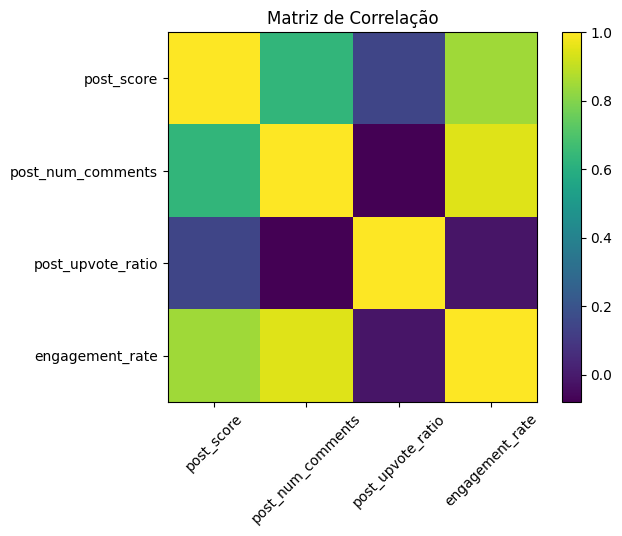

In [19]:
# Matrix de correlação
plt.imshow(corr.values, interpolation='nearest')
plt.xticks(range(len(corr.columns)), corr.columns, rotation=45)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.colorbar()
plt.title('Matriz de Correlação')
plt.show()

Podemos concluir que quanto maior o número de comentários, mais engajamento tem  o post e maior o score do post. A próxima análise é ver quantos posts são virais

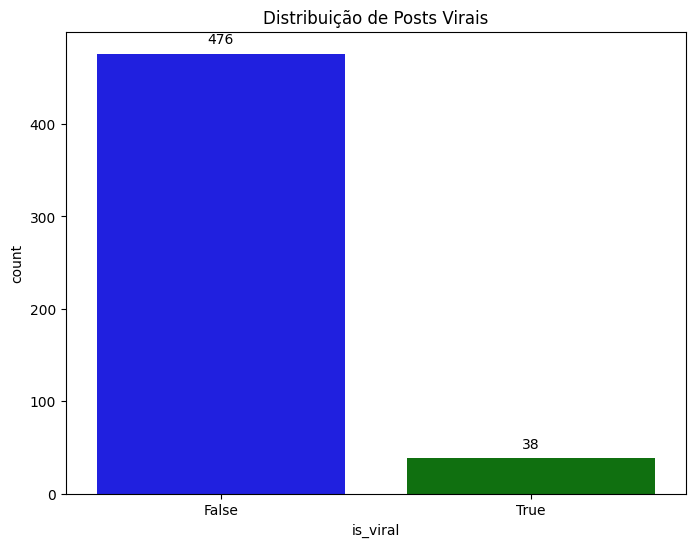

In [20]:
plt.figure(figsize=(8,6))
palette = ['blue', 'green']
ax = sns.countplot(x="is_viral", data=df, palette = palette, hue = 'is_viral', legend= False)
plt.title("Distribuição de Posts Virais")

for p in ax.patches:
    height = p.get_height()

    ax.annotate(
        text=f'{int(height)}',
        xy=(p.get_x() + p.get_width() / 2.0, height),
        xytext=(0, 5),
        textcoords='offset points',
        ha='center',
        va='bottom'
    )

plt.show()

A seguir, serão gerados gráficos com o objetivo de identificar tendências e padrões no dataset.

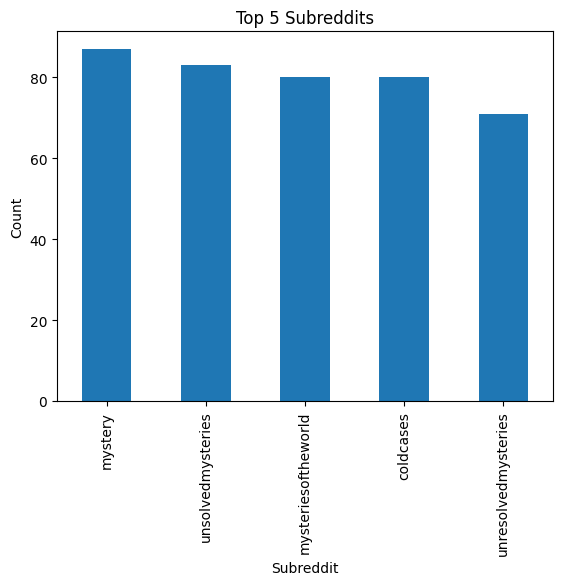

In [21]:
# Subreddit com maior número de posts
top_5_subreddits = df['subreddit'].value_counts().head(5)
top_5_subreddits.plot(kind='bar')
plt.title('Top 5 Subreddits')
plt.xlabel('Subreddit')
plt.ylabel('Count')
plt.show()

In [22]:
df["post_title"]

,post_title
0,We are 5 minutes into this shit
1,We are 5 minutes into this shit
2,"Meet the ""judge"" that signed Trump's search wa..."
3,"Meet the ""judge"" that signed Trump's search wa..."
4,This is going to be a no win election
...,...
509,4 Students who Killed their Teachers
510,4 Students who Killed their Teachers
511,5 Extremely Strange Unsolved Internet Mysteries!
512,5 Extremely Strange Unsolved Internet Mysteries!


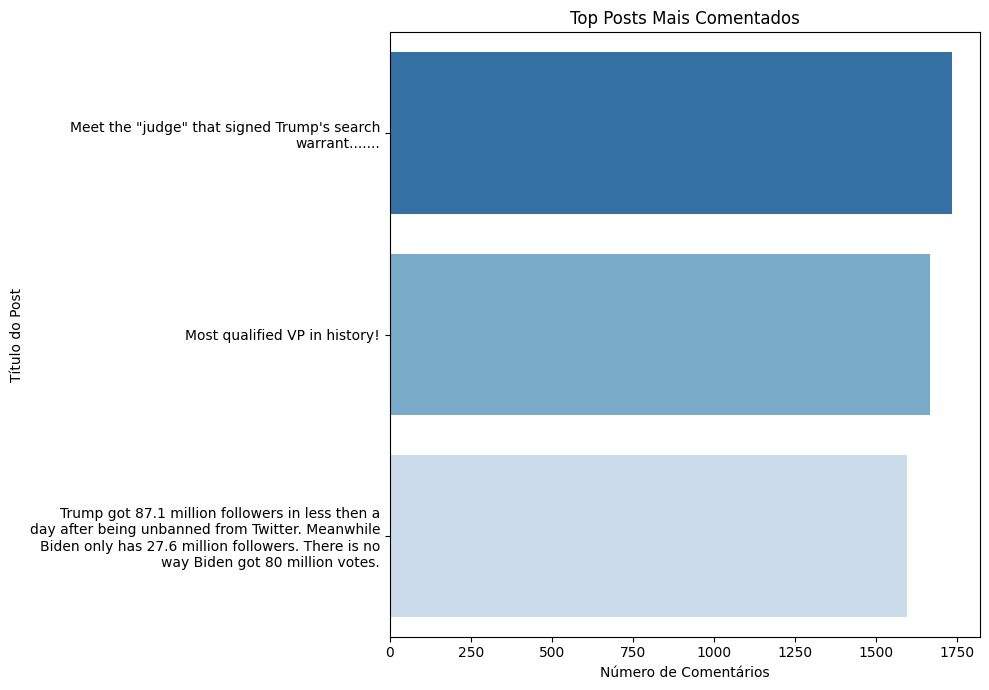

In [23]:
import textwrap

# 1 - Top posts mais comentados
top_posts_comentados = df.nlargest(5, "post_num_comments")[["post_title", "post_num_comments"]]

wrap_width = 50
top_posts_comentados['wrapped_title'] = top_posts_comentados['post_title'].apply(
    lambda x: textwrap.fill(x, width=wrap_width)
)

plt.figure(figsize=(10, 7))
sns.barplot(x="post_num_comments", y="wrapped_title", data=top_posts_comentados, palette="Blues_r", hue = 'wrapped_title', legend = False)
plt.title("Top Posts Mais Comentados")
plt.xlabel("Número de Comentários")
plt.ylabel("Título do Post")
plt.tight_layout()
plt.show()

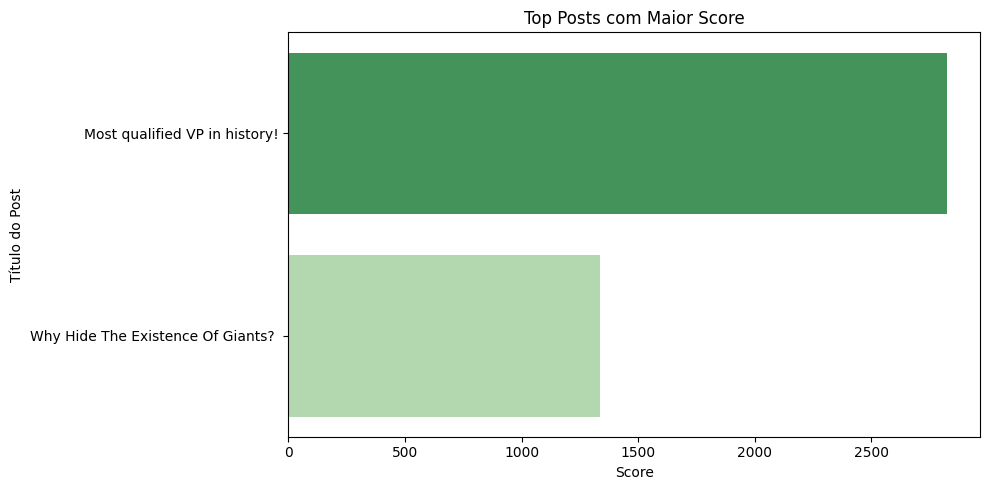

In [24]:
# 2 - Top posts com maior score
top_posts_score = df.nlargest(5, "post_score")[["post_title", "post_score"]]

plt.figure(figsize=(10,5))
sns.barplot(x="post_score", y="post_title", data=top_posts_score, palette="Greens_r", hue = 'post_title', legend = False)
plt.title("Top Posts com Maior Score")
plt.xlabel("Score")
plt.ylabel("Título do Post")
plt.tight_layout()
plt.show()

In [25]:
df['title_length'] = df['post_title'].astype(str).apply(len)

tamanho_medio = df['title_length'].mean()
menor_titulo = df.loc[df['title_length'].idxmin(), 'post_title']
maior_titulo = df.loc[df['title_length'].idxmax(), 'post_title']

print(f"Tamanho médio dos títulos: {tamanho_medio:.2f} caracteres")
print(f"Menor título ({len(menor_titulo)} caracteres): {menor_titulo}")
print(f"Maior título ({len(maior_titulo)} caracteres): {maior_titulo}")

top1_titulo = 'Most qualified VP in history!'
top2_titulo = 'Why Hide The Existence of Giants?'

print(f'tamanho do título com maior post score: {len(top1_titulo)}')
print(f'tamanho do título com segundo maior post score: {len(top2_titulo)}')

Tamanho médio dos títulos: 75.70 caracteres
Menor título (3 caracteres): Law
Maior título (298 caracteres): Kash Patel has just been confirmed as our new FBI director 51-49. I've slapped together a 3 minute video going over his most incredible statements in interviews this last year. This man is one of US and he's about to blow the lid off of ALL of it. So many corrupt members in congress are panicking.
tamanho do título com maior post score: 29
tamanho do título com segundo maior post score: 33


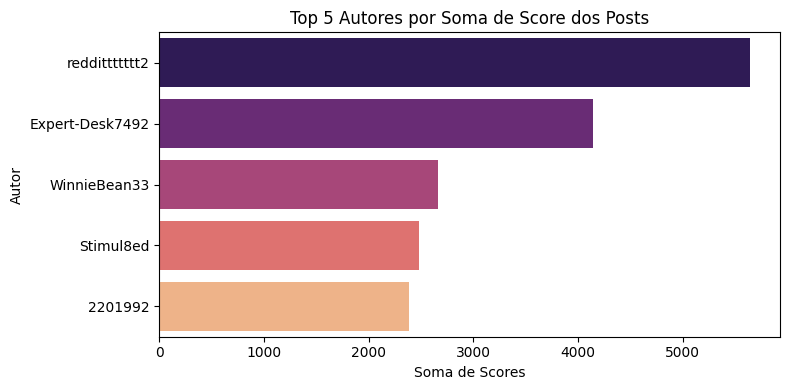

In [26]:
# 3 - Autores com maior post_score
top_5_autor = df.groupby("post_author", as_index=False)["post_score"].sum().nlargest(5, "post_score")

plt.figure(figsize=(8,4))
sns.barplot(x="post_score", y="post_author", data=top_5_autor, palette="magma", hue = 'post_author', legend = False)
plt.title("Top 5 Autores por Soma de Score dos Posts")
plt.xlabel("Soma de Scores")
plt.ylabel("Autor")
plt.tight_layout()
plt.show()

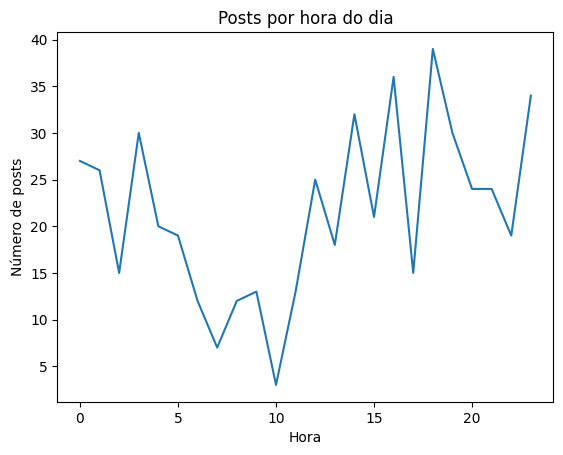

In [27]:
# Hora das postagens durante o dia
df['post_created_dt'] = pd.to_datetime(df['post_created_utc'], unit='s')
df['post_hour'] = df['post_created_dt'].dt.hour
hourly = df.groupby('post_hour').size()
plt.plot(hourly.index, hourly.values)
plt.title('Posts por hora do dia')
plt.xlabel('Hora')
plt.ylabel('Número de posts')
plt.show()

# Análise de Texto ✍️

In [28]:
import re
import string

# Bibliotecas para Processamento de Linguagem Natural (PLN)
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.rslp import RSLPStemmer
from nltk.probability import FreqDist
from wordcloud import WordCloud

# Configurações de visualização
sns.set_style("whitegrid")
%matplotlib inline

# Download de recursos necessários do NLTK (executar apenas na primeira vez)
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('rslp')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package rslp to /root/nltk_data...
[nltk_data]   Unzipping stemmers/rslp.zip.


True

In [29]:
# Combinando título e texto do post em uma única coluna de texto
# Preenchendo valores nulos com strings vazias para evitar erros
df['post_all_text'] = df['post_title'].fillna('') + ' - [' + df['post_text'].fillna('') + ']' # Título - [Texto do Post]

df['post_all_text']

,post_all_text
0,We are 5 minutes into this shit - [And I can’t...
1,We are 5 minutes into this shit - [And I can’t...
2,"Meet the ""judge"" that signed Trump's search wa..."
3,"Meet the ""judge"" that signed Trump's search wa..."
4,This is going to be a no win election - [I tr...
...,...
509,4 Students who Killed their Teachers - []
510,4 Students who Killed their Teachers - []
511,5 Extremely Strange Unsolved Internet Mysterie...
512,5 Extremely Strange Unsolved Internet Mysterie...


In [30]:
# Criando uma coluna para o número de caracteres
df['post_text_length'] = df['post_text'].str.len() # Número de caracteres do TEXTO do post

# Criando uma coluna para o número de palavras
df['post_text_word_count'] = df['post_text'].fillna('').apply(lambda x: len(x.split()))

# Exibindo estatísticas descritivas para as novas colunas
print("Estatísticas Descritivas do Comprimento do Texto dos Posts:")
display(df[['post_text_length', 'post_text_word_count']].describe())

Estatísticas Descritivas do Comprimento do Texto dos Posts:


,post_text_length,post_text_word_count
count,334.000000,514.000000
mean,1340.437126,145.850195
std,2573.012464,377.255379
min,13.000000,0.000000
25%,231.000000,0.000000
50%,595.000000,33.000000
75%,1269.000000,131.000000
max,16770.000000,2920.000000


In [31]:
def remove_stopwords_func(tokens):
    return [word for word in tokens if word not in stop_words]

# Carregando a lista de stopwords em inglês
stop_words = set(stopwords.words('english'))

# Aplicando a função
df['post_text_token'] = df['post_text_token'].apply(remove_stopwords_func)

/tmp/ipython-input-56696412.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=unigrams_df, x='Frequência', y='Palavra', palette='plasma')


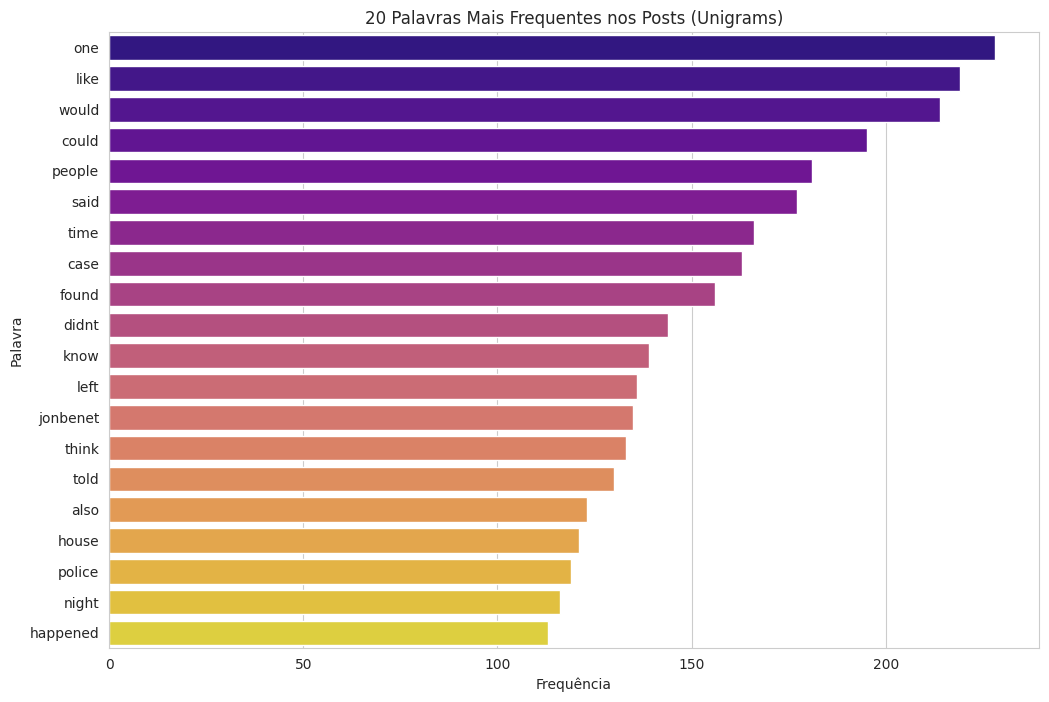

In [32]:
# Criando uma lista única com todos os tokens (sem stopwords)
all_tokens = [token for sublist in df['post_text_token'] for token in sublist]

# Calculando a frequência de cada token
freq_dist = FreqDist(all_tokens)

# Convertendo a distribuição de frequência para um DataFrame para facilitar a visualização
unigrams_df = pd.DataFrame(freq_dist.most_common(20), columns=['Palavra', 'Frequência'])

# Visualização 2: Gráfico de barras das palavras mais comuns
plt.figure(figsize=(12, 8))
sns.barplot(data=unigrams_df, x='Frequência', y='Palavra', palette='plasma')
plt.title('20 Palavras Mais Frequentes nos Posts (Unigrams)')
plt.xlabel('Frequência')
plt.ylabel('Palavra')
plt.show()

/tmp/ipython-input-2943653313.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=bigrams_df, x='Frequência', y='Bigram', palette='magma')


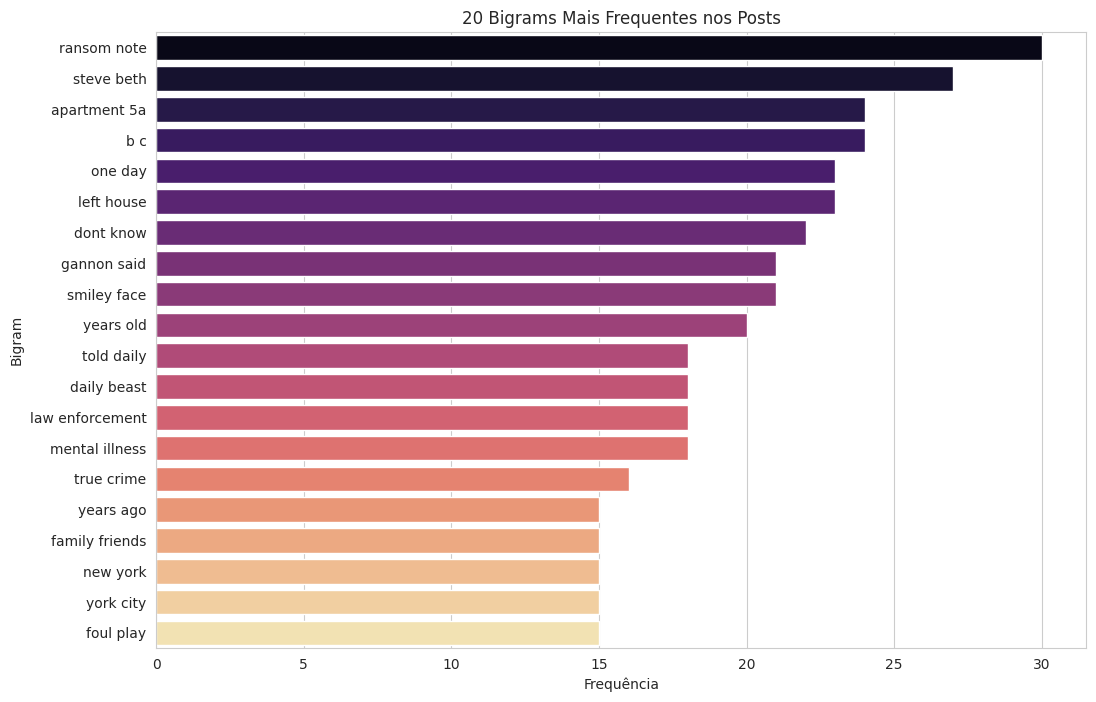

In [33]:
# Gerando bigrams a partir da lista de todos os tokens
bigrams = list(nltk.bigrams(all_tokens))

# Calculando a frequência de cada bigram
freq_dist_bigrams = FreqDist(bigrams)

# Formatando os bigrams para visualização
bigrams_list_for_df = freq_dist_bigrams.most_common(20)
bigrams_df = pd.DataFrame(bigrams_list_for_df, columns=['Bigram', 'Frequência'])
bigrams_df['Bigram'] = bigrams_df['Bigram'].apply(lambda x: ' '.join(x))

# Visualização: Gráfico de barras dos bigrams mais comuns
plt.figure(figsize=(12, 8))
sns.barplot(data=bigrams_df, x='Frequência', y='Bigram', palette='magma')
plt.title('20 Bigrams Mais Frequentes nos Posts')
plt.xlabel('Frequência')
plt.ylabel('Bigram')
plt.show()

#Word Cloud ☁️

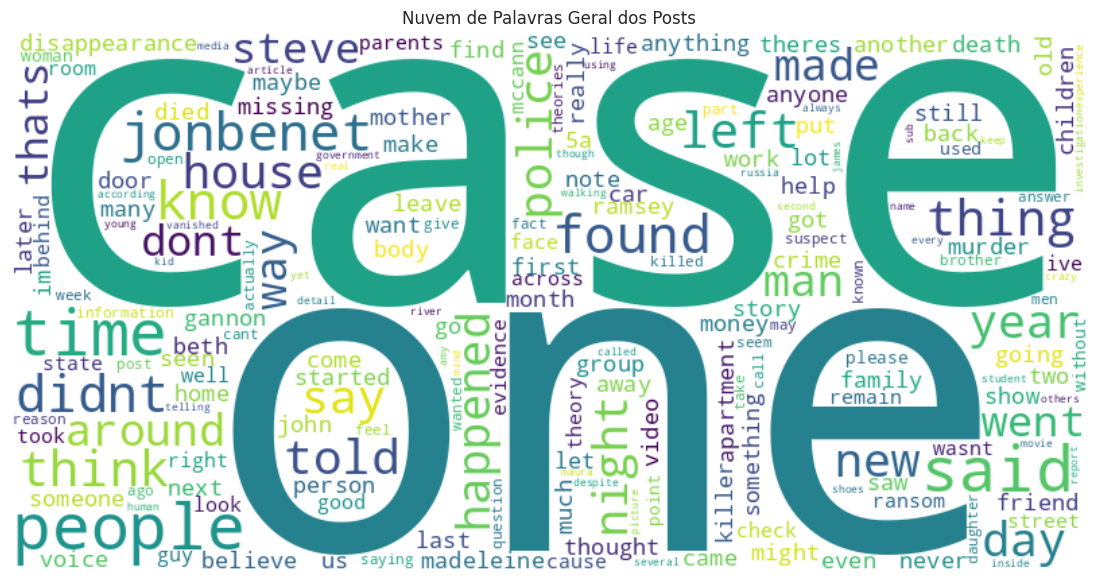

In [34]:
# Concatenando todos os tokens em uma única string
text_for_wordcloud = ' '.join(all_tokens)

# Criando o objeto WordCloud
# background_color='white' melhora a legibilidade
# collocations=False evita que a biblioteca agrupe bigrams automaticamente
wordcloud = WordCloud(width=800, height=400, background_color='white', collocations=False).generate(text_for_wordcloud)

# Exibindo a nuvem de palavras com Matplotlib
plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off') # Remove os eixos
plt.title('Nuvem de Palavras Geral dos Posts')
plt.show()

## Stemming

In [35]:
# Instanciando o stemmer
stemmer = RSLPStemmer()

# Função para aplicar o stemming a uma lista de tokens
def stem_tokens(tokens):
    return [stemmer.stem(token) for token in tokens]

# Aplicando a função para criar uma nova coluna de tokens com stemming
df['tokens_stemmed'] = df['post_text_token'].apply(stem_tokens)

# Exibindo o resultado do stemming
print("Comparação de Tokens sem Stopwords vs. Tokens com Stemming:")
display(df[['post_text_token', 'tokens_stemmed']].head())

Comparação de Tokens sem Stopwords vs. Tokens com Stemming:


,post_text_token,tokens_stemmed
0,"[cant, stop, laughing, like, lady, answer, que...","[cant, stop, laughing, lik, lady, answ, questi..."
1,"[cant, stop, laughing, like, lady, answer, que...","[cant, stop, laughing, lik, lady, answ, questi..."
2,[],[]
3,[],[]
4,"[truly, feel, either, election, rigged, get, k...","[truly, feel, eith, election, rigged, get, kam..."


/tmp/ipython-input-3313210722.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=stemmed_df, x='Frequência', y='Radical', palette='viridis')


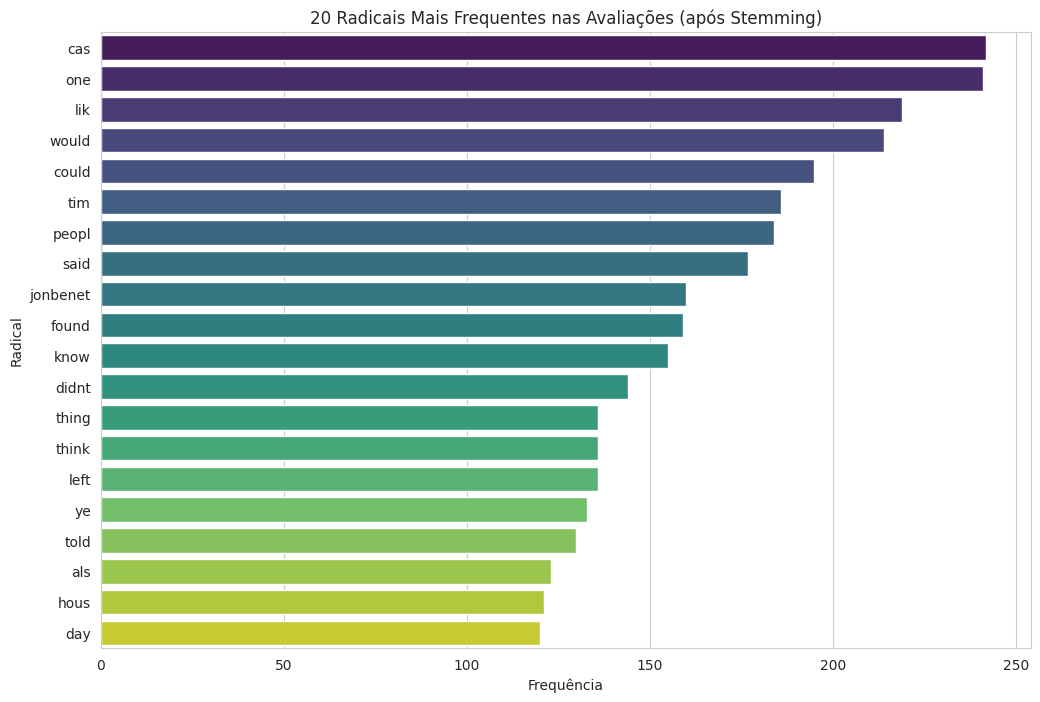

In [36]:
# lista única com todos os tokens com stemming
all_stemmed_tokens = [token for sublist in df['tokens_stemmed'] for token in sublist]

# Calculando a frequência de cada radical
freq_dist_stemmed = FreqDist(all_stemmed_tokens)

# Convertendo para DataFrame para visualização
stemmed_list_for_df = freq_dist_stemmed.most_common(20)
stemmed_df = pd.DataFrame(stemmed_list_for_df, columns=['Radical', 'Frequência'])
# Visualização 3: Gráfico de barras dos radicais mais comuns
plt.figure(figsize=(12, 8))
sns.barplot(data=stemmed_df, x='Frequência', y='Radical', palette='viridis')
plt.title('20 Radicais Mais Frequentes nas Avaliações (após Stemming)')
plt.xlabel('Frequência')
plt.ylabel('Radical')
plt.show()

## Topic Modeling e LDA

In [37]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

vectorizer = CountVectorizer(max_df=0.95, min_df=2)

df['texto_junto'] = df['tokens_stemmed'].apply(lambda tokens: ' '.join(tokens))
doc_term_matrix = vectorizer.fit_transform(df['texto_junto'])

# Instanciando o modelo LDA
# n_components é o número de tópicos que queremos encontrar
lda_model = LatentDirichletAllocation(n_components=5, random_state=42)

# Treinando o modelo com a matriz documento-termo
lda_model.fit(doc_term_matrix)

LatentDirichletAllocation(n_components=5, random_state=42)

In [38]:
# Função para exibir os tópicos
def display_topics(model, feature_names, num_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print(f"Tópico {topic_idx + 1}:")
        print(" ".join([feature_names[i] for i in topic.argsort()[:-num_top_words - 1:-1]]))

feature_names = vectorizer.get_feature_names_out()
num_top_words = 10

# Exibindo os tópicos
display_topics(lda_model, feature_names, num_top_words)

Tópico 1:
cas peopl lik one thing could ye cam murd see
Tópico 2:
cas said found gannon one lik new know could would
Tópico 3:
know russ missing would think im one nat ive illnes
Tópico 4:
jonbenet would stev hous beth one lik didnt tim left
Tópico 5:
madelein apartment 5a disappearanc night polic one mccanm tim could


A Análise Exploratória de Dados (EDA) forneceu informações valiosas. Com ela, conseguimos identificar qual subreddit tem mais postagens, os posts com maior score e mais comentários, os autores com as melhores pontuações e os horários em que as pessoas mais postam. Um achado interessante foi notar que posts com títulos mais curtos parecem ter mais chance de viralizar.


Além disso, criamos as colunas engagement_rate, upvote_effectiveness e is_viral, que revelaram padrões relevantes.

Primeiro, a maioria dos posts tem um engagement_rate baixo, o que mostra que o engajamento é concentrado em poucas publicações. Segundo, posts com alta upvote_effectiveness (ou seja, muitos upvotes em proporção aos comentários) sugerem que o conteúdo foi aprovado diretamente pelo público, sem gerar grande debate.

Por fim, embora a proporção de posts marcados como virais seja pequena, eles possuem médias de score e engagement_rate muito superiores. Isso reforça que a métrica is_viral é realmente útil para identificar conteúdos de alto impacto.